Ideen für diverse Visualisierungen

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
# import geopandas as gpd
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import confusion_matrix

# GeoDataFrame laden
df = gpd.read_file("../../../../data/analysis/worldcover/arealstatistik_mapped_points_2020.gpkg")

# Klassen vergleichen
y_true = df["IPCC_AS_Id"]
y_pred = df["IPCC_WC_Id"]

# Alle Klassen bestimmen
labels = sorted(set(y_true).union(set(y_pred)))

# Confusion Matrix erstellen
cm = confusion_matrix(y_true, y_pred, labels=labels)

# Größe und Schrift dynamisch anpassen
fig_width = max(10, len(labels) * 0.5)
fig_height = max(8, len(labels) * 0.5)

plt.figure(figsize=(fig_width, fig_height))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlOrRd", 
            xticklabels=labels, yticklabels=labels,
            annot_kws={"size": 9})

plt.title("Vergleich Arealstatistik zu WorldCover (Confusion Matrix)")
plt.xlabel("WorldCover Klasse (Vorhersage)")
plt.ylabel("Arealstatistik Klasse (Wahrheit)")
plt.tight_layout()
plt.show()


Werte zwichen speichern um Diagramm anzupassen

In [4]:
import pandas as pd

# cm = confusion_matrix(y_true, y_pred, labels=labels)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
cm_df.to_csv("confusion_matrix.csv")


NameError: name 'cm' is not defined

Matrix neuladen zum darstellen

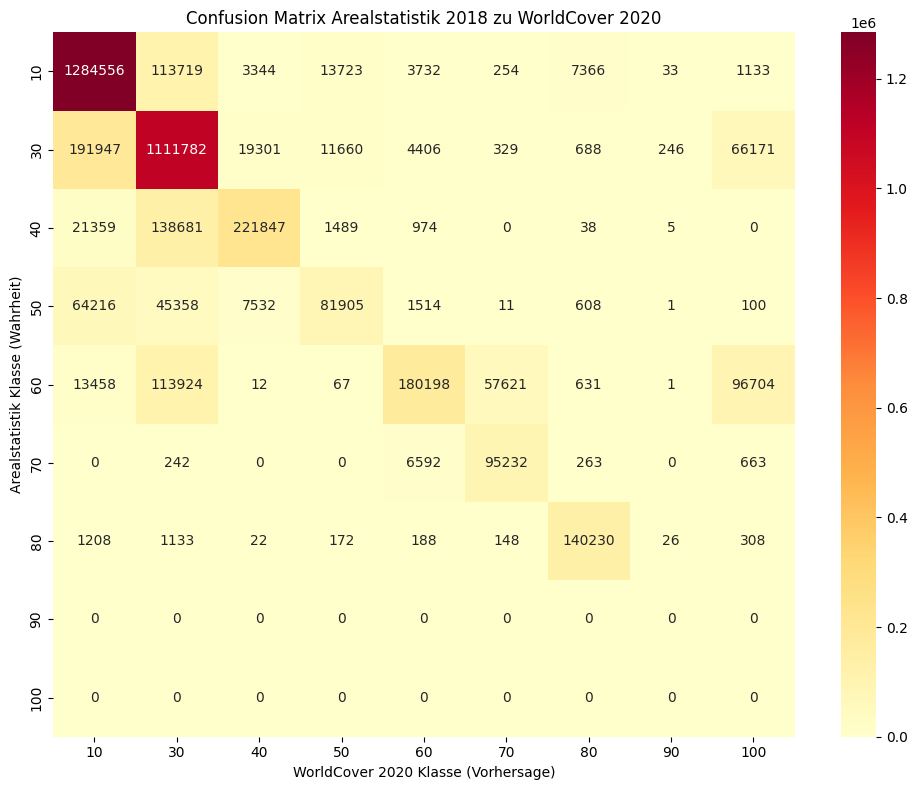

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV laden
cm_df = pd.read_csv("confusion_matrix.csv", index_col=0)

# Visualisieren als Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="YlOrRd",
            xticklabels=cm_df.columns, yticklabels=cm_df.index)
plt.title("Confusion Matrix Arealstatistik 2018 zu WorldCover 2020")
plt.xlabel("WorldCover 2020 Klasse (Vorhersage)")
plt.ylabel("Arealstatistik Klasse (Wahrheit)")
plt.tight_layout()
plt.show()


Prozentuale Verteilung der Klassen in Arealstatistik und WorldCover

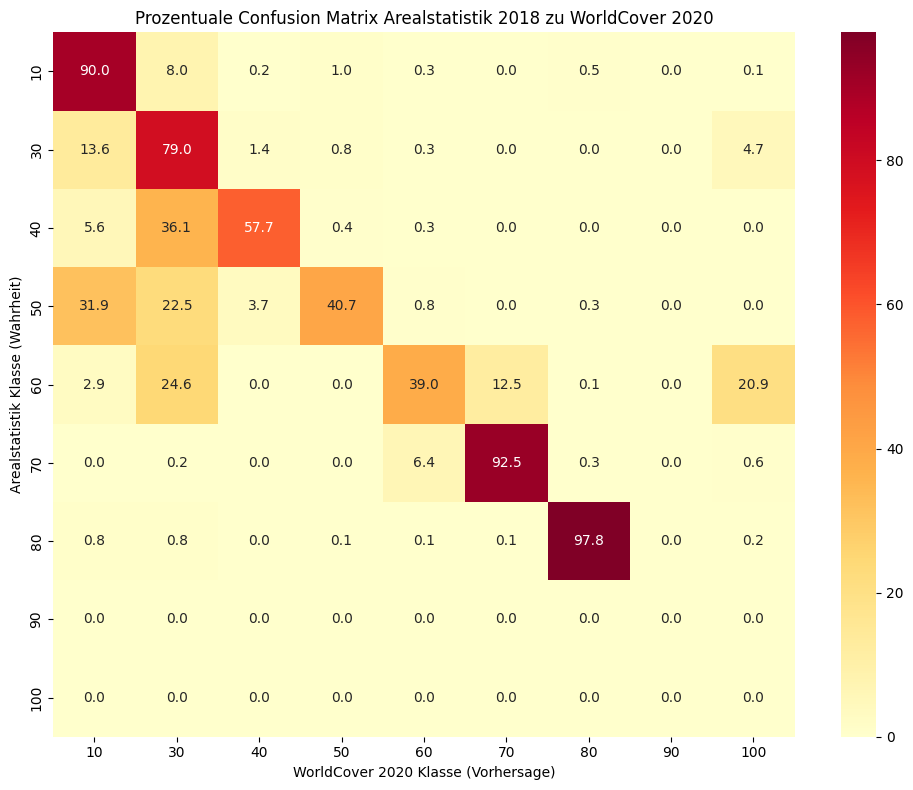

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV laden
cm_df = pd.read_csv("confusion_matrix.csv", index_col=0)

# Prozentwerte pro Zeile berechnen
cm_percent = cm_df.div(cm_df.sum(axis=1), axis=0) * 100

cm_percent = cm_percent.fillna(0.0)


# Heatmap mit Prozentwerten
plt.figure(figsize=(10, 8))
sns.heatmap(cm_percent, annot=True, fmt=".1f", cmap="YlOrRd",
            xticklabels=cm_df.columns, yticklabels=cm_df.index)
plt.title("Prozentuale Confusion Matrix Arealstatistik 2018 zu WorldCover 2020")
plt.xlabel("WorldCover 2020 Klasse (Vorhersage)")
plt.ylabel("Arealstatistik Klasse (Wahrheit)")
plt.tight_layout()
plt.show()


Labels anpassen von Zahlen zu Klassenbezeichnungen

In [1]:
label_names = {
    10: "Baumbestand",
    20: "Shrubland",
    30: "Wiese",
    40: "Ackerland",
    50: "Aufgebaut",
    60: "Karge / spärliche Vegetation",
    70: "Schnee und Eis",
    80: "Dauerhafte Gewässer",
    90: "Krautiges Feuchtgebiet",
    100: "Moos und Flechten"
}

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV laden
cm_df = pd.read_csv("confusion_matrix.csv", index_col=0)

# Prozentwerte pro Zeile berechnen
cm_percent = cm_df.div(cm_df.sum(axis=1), axis=0) * 100

cm_percent = cm_percent.fillna(0.0)

# Erst Spaltennamen als Integer umwandeln
cm_percent.columns = cm_percent.columns.astype(int)
cm_percent.index = cm_percent.index.astype(int)  # Optional, falls index auch als String ist

# Dann Mapping anwenden
cm_percent_named = cm_percent.rename(index=label_names, columns=label_names)

annot_matrix = cm_percent_named.applymap(lambda x: f"{x:.1f}%") # Zahlen mit Prozentzeichen

# Heatmap mit vmin/vmax (maximaler Wert = 100)
plt.figure(figsize=(10, 8))
ax = sns.heatmap(
    cm_percent_named,
    annot=annot_matrix,
    fmt="",
    cmap="YlOrRd",
    xticklabels=cm_percent_named.columns,
    yticklabels=cm_percent_named.index,
    cbar=True,
    vmin=0, vmax=100  # Wichtig!
)
plt.title("Confusion Matrix Arealstatistik 2018 zu WorldCover 2020")
plt.xlabel("WorldCover 2020 Klasse")
plt.ylabel("Arealstatistik 2018 Klasse")
plt.tight_layout()

# Colorbar anpassen
colorbar = ax.collections[0].colorbar
ticks = [0, 20, 40, 60, 80, 100]
colorbar.set_ticks(ticks)
colorbar.set_ticklabels([f"{tick}%" for tick in ticks])
colorbar.set_label("", rotation=270, labelpad=20)

plt.show()





FileNotFoundError: [Errno 2] No such file or directory: 'confusion_matrix.csv'

Selbes mit absoulten Werten

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Eigene Tausendertrennung mit Hochkomma
def swiss_format(x):
    return f"{int(x):,}".replace(",", "'")

abs_matrix = cm_df.rename(index=label_names, columns=label_names)
abs_annot = abs_matrix.applymap(swiss_format)

plt.figure(figsize=(12, 10))  # Größere Felder durch mehr Platz!
ax = sns.heatmap(
    cm_percent_named,
    annot=abs_annot,
    fmt="",
    cmap="YlOrRd",
    xticklabels=cm_percent_named.columns,
    yticklabels=cm_percent_named.index,
    cbar=True,
    vmin=0, vmax=100,
    linewidths=2  # Noch klarere Abtrennung
)

plt.title("Confusion Matrix Arealstatistik 2018 zu WorldCover 2020 (Absolute Werte, Färbung nach %)")
plt.xlabel("WorldCover 2020 Klasse")
plt.ylabel("Arealstatistik 2018 Klasse")
plt.tight_layout()

colorbar = ax.collections[0].colorbar
ticks = [0, 20, 40, 60, 80, 100]
colorbar.set_ticks(ticks)
colorbar.set_ticklabels([f"{tick}%" for tick in ticks])
colorbar.set_label("", rotation=270, labelpad=20)

plt.show()



NameError: name 'cm_df' is not defined

Prozent mit Farbe und Beschriftung in den Zellen nicht klar unterscheidbar
Zahlen weg 
Dreieckig halbieren, Hälften verschieden einfärben
Grösse der Zellen anpassen

small multiples nebeneinander, einmal absoult einmal relativ

0 werte läschen / weiss machen, Farbskala Fixe Kategorien z.B. 10 % Schritte

Produzenten / Senken, Zunahmen / Abnahmen bei zeitlichen Vergleichen

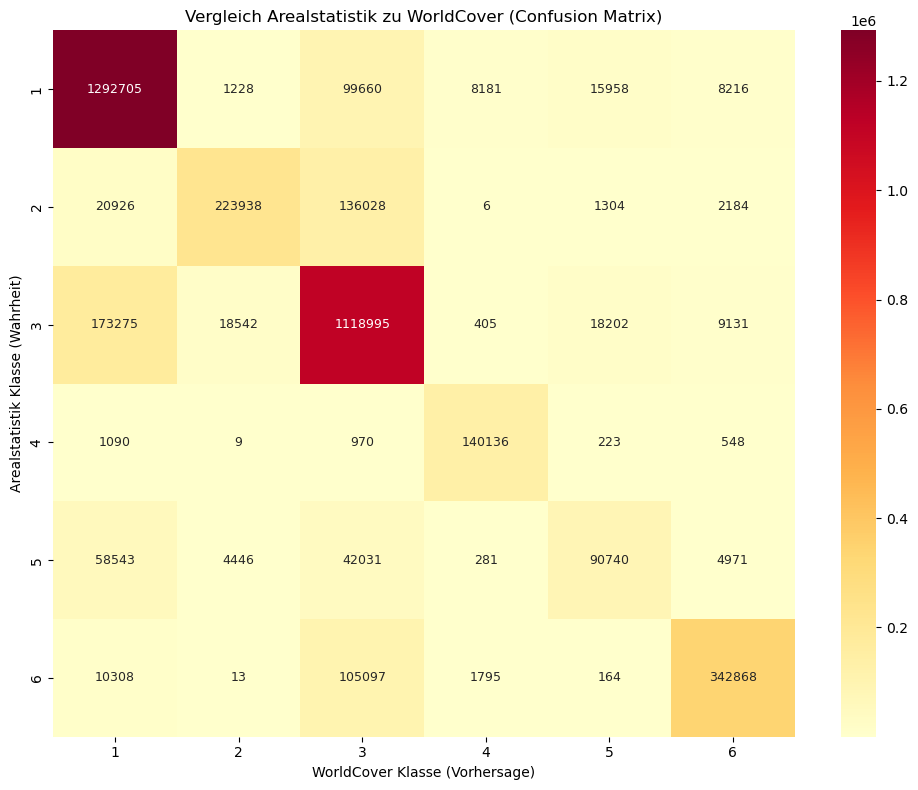

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# GeoDataFrame laden
df = gpd.read_file("../../../../data/analysis/worldcover/arealstatistik_mapped_points_2020.gpkg")

# Nur Zeilen ohne NaN in den relevanten Spalten behalten
mask = df["IPCC_AS_Id"].notna() & df["IPCC_WC_Id"].notna()
y_true = df.loc[mask, "IPCC_AS_Id"]
y_pred = df.loc[mask, "IPCC_WC_Id"]

# Alle Klassen bestimmen (ohne NaN)
labels = sorted(set(y_true).union(set(y_pred)))

# Confusion Matrix erstellen
cm = confusion_matrix(y_true, y_pred, labels=labels)

# Größe und Schrift dynamisch anpassen
fig_width = max(10, len(labels) * 0.5)
fig_height = max(8, len(labels) * 0.5)

plt.figure(figsize=(fig_width, fig_height))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlOrRd", 
            xticklabels=labels, yticklabels=labels,
            annot_kws={"size": 9})

plt.title("Vergleich Arealstatistik zu WorldCover (Confusion Matrix)")
plt.xlabel("WorldCover Klasse (Vorhersage)")
plt.ylabel("Arealstatistik Klasse (Wahrheit)")
plt.tight_layout()
plt.show()


Start of testing for group

In [3]:
import geopandas as gpd
import pandas as pd
from sklearn.metrics import confusion_matrix

# GeoDataFrame laden
df = gpd.read_file("../../../../data/analysis/worldcover/arealstatistik_mapped_points_2020.gpkg")

# Nur Zeilen ohne NaN in den relevanten Spalten behalten
mask = df["IPCC_AS_Id"].notna() & df["IPCC_WC_Id"].notna()
y_true = df.loc[mask, "IPCC_AS_Id"]
y_pred = df.loc[mask, "IPCC_WC_Id"]

# Alle Klassen bestimmen (ohne NaN)
labels = sorted(set(y_true).union(set(y_pred)))

# Confusion Matrix erstellen
cm = confusion_matrix(y_true, y_pred, labels=labels)

# In DataFrame umwandeln mit Klassen als Index und Spaltennamen
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

# In CSV speichern
cm_df.to_csv("confusion_matrix.csv")
print("Confusion Matrix gespeichert als confusion_matrix.csv")


Confusion Matrix gespeichert als confusion_matrix.csv


saved now adjusting visualization Prozentual

C:\Users\alexa\AppData\Local\Temp\ipykernel_30276\2869108265.py:28: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_matrix = cm_percent_named.applymap(lambda x: f"{x:.1f}%")


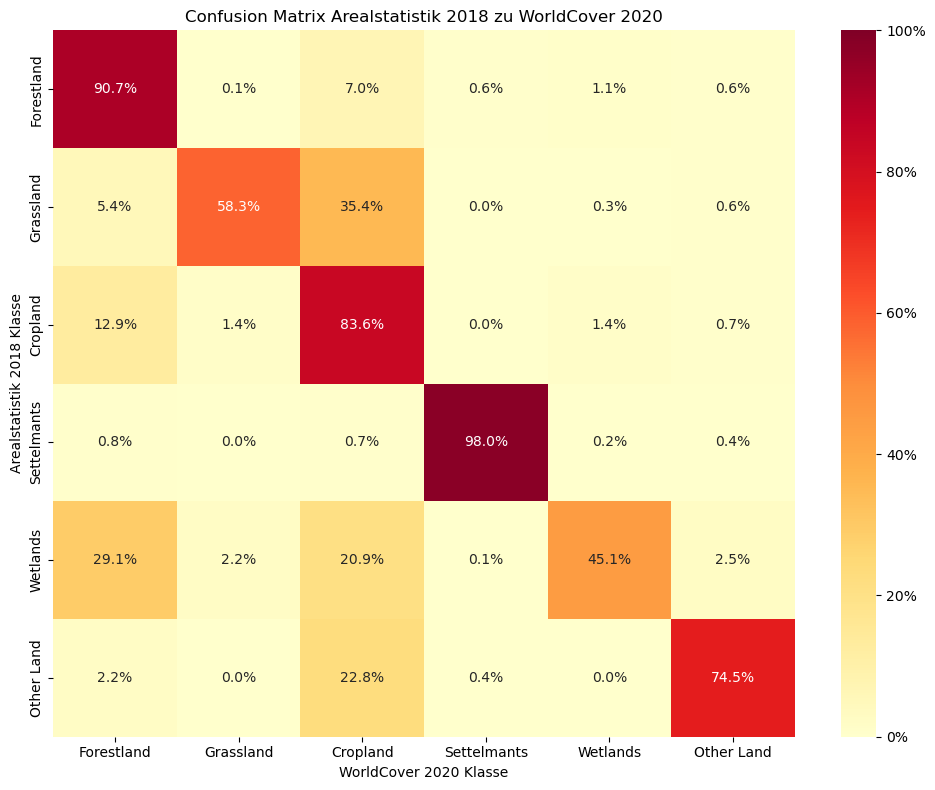

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mapping für Label-Namen (optional)
label_names = {
    1: "Forestland",
    2: "Grassland",
    3: "Cropland",
    4: "Settelmants",
    5: "Wetlands",
    6: "Other Land"
}

# CSV laden
cm_df = pd.read_csv("confusion_matrix.csv", index_col=0)

# Prozentwerte pro Zeile berechnen
cm_percent = cm_df.div(cm_df.sum(axis=1), axis=0) * 100
cm_percent = cm_percent.fillna(0.0)

# Spalten und Index in int konvertieren, dann in Namen umwandeln
cm_percent.columns = cm_percent.columns.astype(int)
cm_percent.index = cm_percent.index.astype(int)
cm_percent_named = cm_percent.rename(index=label_names, columns=label_names)

# Annotierungsformat mit Prozentzeichen
annot_matrix = cm_percent_named.applymap(lambda x: f"{x:.1f}%")

# Heatmap mit vmin/vmax (maximaler Wert = 100)
plt.figure(figsize=(10, 8))
ax = sns.heatmap(
    cm_percent_named,
    annot=annot_matrix,
    fmt="",
    cmap="YlOrRd",
    xticklabels=cm_percent_named.columns,
    yticklabels=cm_percent_named.index,
    cbar=True,
    vmin=0, vmax=100
)

plt.title("Confusion Matrix Arealstatistik 2018 zu WorldCover 2020")
plt.xlabel("WorldCover 2020 Klasse")
plt.ylabel("Arealstatistik 2018 Klasse")
plt.tight_layout()

# Colorbar anpassen
colorbar = ax.collections[0].colorbar
ticks = [0, 20, 40, 60, 80, 100]
colorbar.set_ticks(ticks)
colorbar.set_ticklabels([f"{tick}%" for tick in ticks])
colorbar.set_label("", rotation=270, labelpad=20)

plt.show()


absolut

C:\Users\alexa\AppData\Local\Temp\ipykernel_30276\4187546089.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_matrix = cm_named.applymap(lambda x: f"{int(x)}")


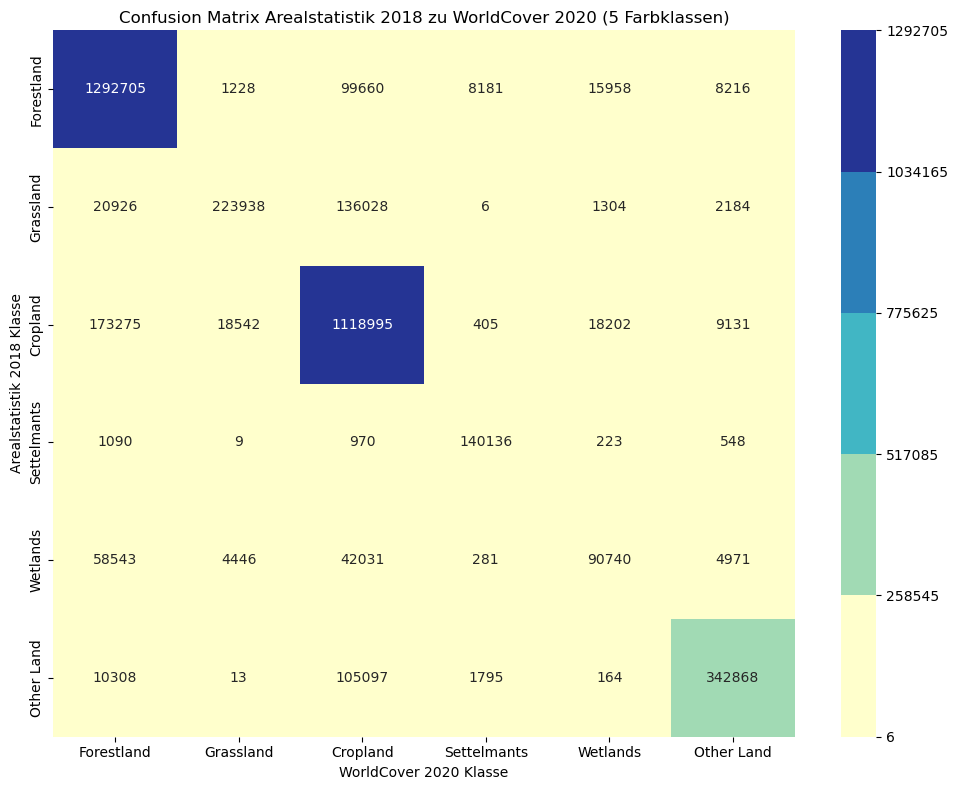

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap, BoundaryNorm
import numpy as np

# Mapping für Label-Namen (optional)
label_names = {
    1: "Forestland",
    2: "Grassland",
    3: "Cropland",
    4: "Settelmants",
    5: "Wetlands",
    6: "Other Land"
}

# CSV laden
cm_df = pd.read_csv("confusion_matrix.csv", index_col=0)

# Spalten und Index in int konvertieren, dann in Namen umwandeln
cm_df.columns = cm_df.columns.astype(int)
cm_df.index = cm_df.index.astype(int)
cm_named = cm_df.rename(index=label_names, columns=label_names)

# Annotierungsformat als ganze Zahlen
annot_matrix = cm_named.applymap(lambda x: f"{int(x)}")

# Definiere 5 diskrete Farbklassen (Beispiel-Farbpalette)
colors = ["#ffffcc", "#a1dab4", "#41b6c4", "#2c7fb8", "#253494"]  # Von hell zu dunkel
cmap = ListedColormap(colors)

# Intervallgrenzen für Farbklassen (5 Klassen, anpassen je nach max Werten)
bounds = np.linspace(cm_named.values.min(), cm_named.values.max(), 6)
norm = BoundaryNorm(bounds, cmap.N)

plt.figure(figsize=(10, 8))
ax = sns.heatmap(
    cm_named,
    annot=annot_matrix,
    fmt="",
    cmap=cmap,
    norm=norm,
    xticklabels=cm_named.columns,
    yticklabels=cm_named.index,
    cbar=True
)

plt.title("Confusion Matrix Arealstatistik 2018 zu WorldCover 2020 (5 Farbklassen)")
plt.xlabel("WorldCover 2020 Klasse")
plt.ylabel("Arealstatistik 2018 Klasse")
plt.tight_layout()

# Colorbar anpassen mit Diskreten Farben und passenden Ticks
colorbar = ax.collections[0].colorbar
colorbar.set_ticks(bounds)
colorbar.set_ticklabels([f"{int(b)}" for b in bounds])
colorbar.set_label("", rotation=270, labelpad=20)

plt.show()


Confusion Matrix
Irgendsoeine Darstellung muss man haben. Die Farbskala kategorisieren ist einfacher zulesen als kontinuierliche Klasse, 0er werte nicht beschriften oder mindestens  weiss machen. 0er und kleisnste Werte weiss sind, geben ein ruhigeres Bild. Manchmal sind die grössten Änderungen nicht die spannendesten, eventuell Quantilsverteilung (alle Klassen gleich gross machen (5 quantile), mal ausprobieren und was ist die Aussage, die man machen möchte. 


Spannend wäre eine Aussage zu finden die , das z.B. in As 23% mehr Produzenten als in worldcover vorhanden sind und das worldcover besser stimmen würde. 

Aus visueller perspektive ist es unschön, das es angeschrieben ist und anderer wert hervorgerufen wird und ohne titel schwirig zulesen. 

Eventuell Felder diagonal trennen eine hälfte mit farbton absolute grösse und andere hälfte und farbton die relativen werte. Eventuell mit bivariate farbschemen arbeiten (eventuell auch in 4 kategorien kategorisieren)


lograithmus


C:\Users\alexa\AppData\Local\Temp\ipykernel_30276\1552458477.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_matrix = cm_named.applymap(lambda x: f"{int(x)}")


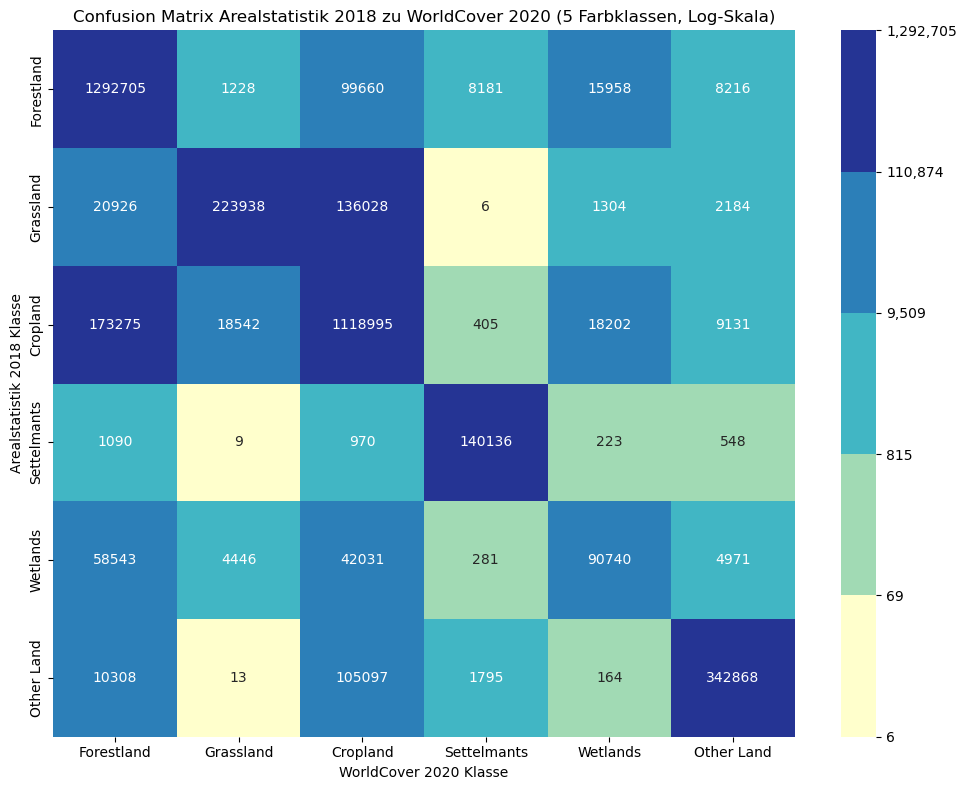

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap, BoundaryNorm, LogNorm
import numpy as np

# Mapping für Label-Namen (optional)
label_names = {
    1: "Forestland",
    2: "Grassland",
    3: "Cropland",
    4: "Settelmants",
    5: "Wetlands",
    6: "Other Land"
}

# CSV laden
cm_df = pd.read_csv("confusion_matrix.csv", index_col=0)

# Spalten und Index in int konvertieren, dann in Namen umwandeln
cm_df.columns = cm_df.columns.astype(int)
cm_df.index = cm_df.index.astype(int)
cm_named = cm_df.rename(index=label_names, columns=label_names)

# Annotierungsformat als ganze Zahlen
annot_matrix = cm_named.applymap(lambda x: f"{int(x)}")

# Definiere 5 diskrete Farbklassen (Beispiel-Farbpalette)
colors = ["#ffffcc", "#a1dab4", "#41b6c4", "#2c7fb8", "#253494"]
cmap = ListedColormap(colors)

# Wertebereich bestimmen (min > 0 für log scale)
cm_values = cm_named.values
cm_min = cm_values[cm_values > 0].min()  # Minimum positive value
cm_max = cm_values.max()

# Logarithmische Grenzen für Farbklassen (5 Klassen)
bounds = np.logspace(np.log10(cm_min), np.log10(cm_max), 6)
norm = BoundaryNorm(bounds, cmap.N)

plt.figure(figsize=(10, 8))
ax = sns.heatmap(
    cm_named,
    annot=annot_matrix,
    fmt="",
    cmap=cmap,
    norm=norm,
    xticklabels=cm_named.columns,
    yticklabels=cm_named.index,
    cbar=True
)

plt.title("Confusion Matrix Arealstatistik 2018 zu WorldCover 2020 (5 Farbklassen, Log-Skala)")
plt.xlabel("WorldCover 2020 Klasse")
plt.ylabel("Arealstatistik 2018 Klasse")
plt.tight_layout()

# Colorbar anpassen mit Log-Skala und diskreten Ticks
colorbar = ax.collections[0].colorbar
colorbar.set_ticks(bounds)
colorbar.set_ticklabels([f"{int(b):,}" for b in bounds])
colorbar.set_label("", rotation=270, labelpad=20)

plt.show()


prozent

C:\Users\alexa\AppData\Local\Temp\ipykernel_30276\4275288324.py:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_matrix = cm_percent_named.applymap(lambda x: f"{x:.1f}%")


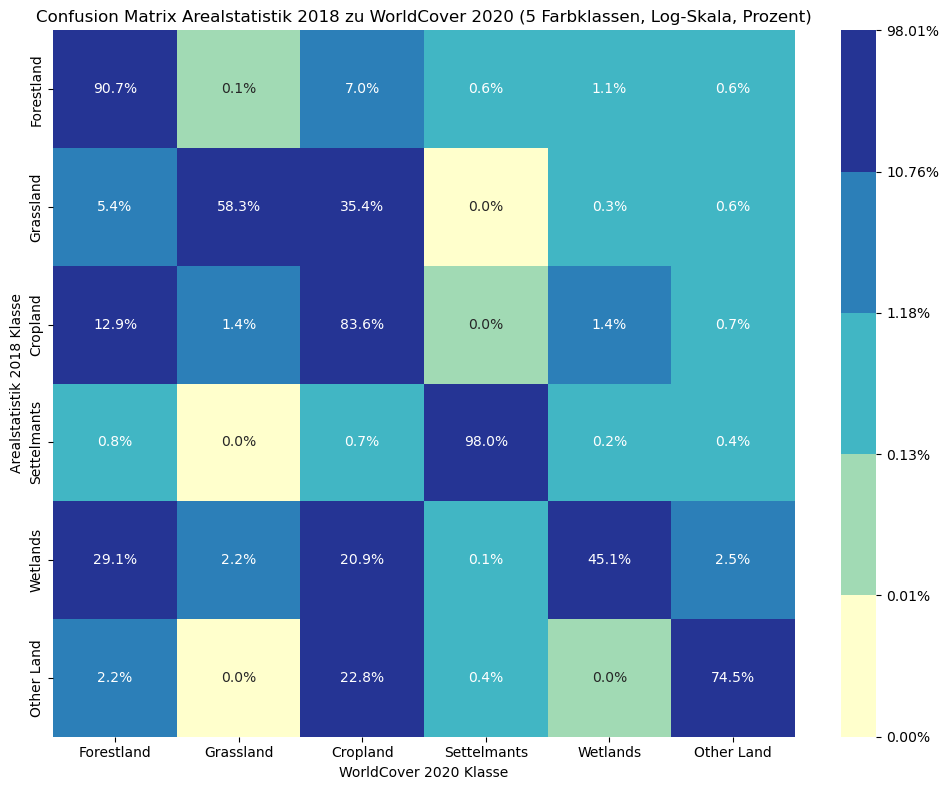

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap, BoundaryNorm
import numpy as np

# Mapping für Label-Namen (optional)
label_names = {
    1: "Forestland",
    2: "Grassland",
    3: "Cropland",
    4: "Settelmants",
    5: "Wetlands",
    6: "Other Land"
}

# CSV mit absoluten Werten laden
cm_df = pd.read_csv("confusion_matrix.csv", index_col=0)

# Prozentwerte pro Zeile berechnen
cm_percent = cm_df.div(cm_df.sum(axis=1), axis=0) * 100
cm_percent = cm_percent.fillna(0.0)

# Spalten und Index in int umwandeln, dann mit Namen ersetzen
cm_percent.columns = cm_percent.columns.astype(int)
cm_percent.index = cm_percent.index.astype(int)
cm_percent_named = cm_percent.rename(index=label_names, columns=label_names)

# Annotierungsformat mit Prozentzeichen
annot_matrix = cm_percent_named.applymap(lambda x: f"{x:.1f}%")

# Diskrete Farbklassen definieren (5 Klassen: von hell bis dunkel)
colors = ["#ffffcc", "#a1dab4", "#41b6c4", "#2c7fb8", "#253494"]
cmap = ListedColormap(colors)

# Wertebereich >0 für log scale
values = cm_percent_named.values
min_val = values[values > 0].min()  # Kleinstes positives Prozent
max_val = values.max()

# Logarithmische Grenzen für 5 Klassen erstellen
bounds = np.logspace(np.log10(min_val), np.log10(max_val), 6)
norm = BoundaryNorm(bounds, cmap.N)

plt.figure(figsize=(10, 8))
ax = sns.heatmap(
    cm_percent_named,
    annot=annot_matrix,
    fmt="",
    cmap=cmap,
    norm=norm,
    xticklabels=cm_percent_named.columns,
    yticklabels=cm_percent_named.index,
    cbar=True
)

plt.title("Confusion Matrix Arealstatistik 2018 zu WorldCover 2020 (5 Farbklassen, Log-Skala, Prozent)")
plt.xlabel("WorldCover 2020 Klasse")
plt.ylabel("Arealstatistik 2018 Klasse")
plt.tight_layout()

# Colorbar mit logarithmischen Ticklabels anpassen
colorbar = ax.collections[0].colorbar
colorbar.set_ticks(bounds)
colorbar.set_ticklabels([f"{b:.2f}%" for b in bounds])
colorbar.set_label("", rotation=270, labelpad=20)

plt.show()


prozent 5 klassen

C:\Users\alexa\AppData\Local\Temp\ipykernel_30276\152515994.py:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_matrix = cm_percent_named.applymap(lambda x: f"{x:.1f}%")


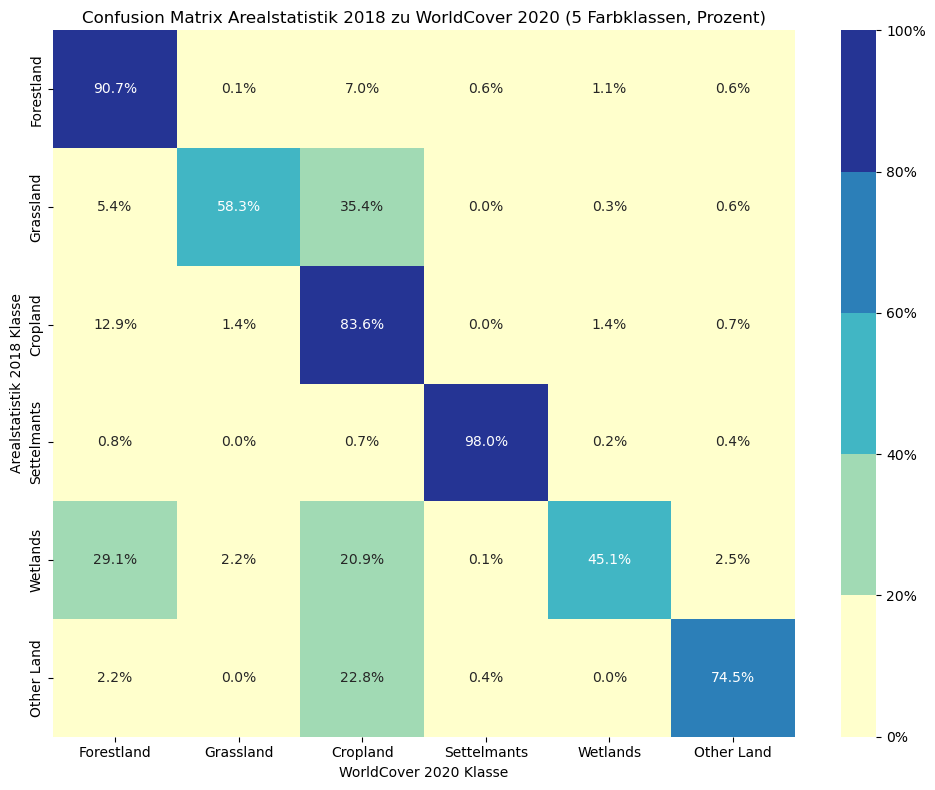

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap, BoundaryNorm
import numpy as np

# Mapping für Label-Namen (optional)
label_names = {
    1: "Forestland",
    2: "Grassland",
    3: "Cropland",
    4: "Settelmants",
    5: "Wetlands",
    6: "Other Land"
}

# CSV mit absoluten Werten laden
cm_df = pd.read_csv("confusion_matrix.csv", index_col=0)

# Prozentwerte pro Zeile berechnen
cm_percent = cm_df.div(cm_df.sum(axis=1), axis=0) * 100
cm_percent = cm_percent.fillna(0.0)

# Spalten und Index in int umwandeln, dann mit Namen ersetzen
cm_percent.columns = cm_percent.columns.astype(int)
cm_percent.index = cm_percent.index.astype(int)
cm_percent_named = cm_percent.rename(index=label_names, columns=label_names)

# Annotierungsformat mit Prozentzeichen
annot_matrix = cm_percent_named.applymap(lambda x: f"{x:.1f}%")

# Definiere 5 diskrete Farbklassen (Beispielpalette von hell bis dunkel)
colors = ["#ffffcc", "#a1dab4", "#41b6c4", "#2c7fb8", "#253494"]
cmap = ListedColormap(colors)

# Grenzen (Bounds) für 5 Klassen auf Prozentwerte von 0 bis 100
bounds = np.linspace(0, 100, 6)  # 0, 20, 40, 60, 80, 100
norm = BoundaryNorm(bounds, cmap.N)

plt.figure(figsize=(10, 8))
ax = sns.heatmap(
    cm_percent_named,
    annot=annot_matrix,
    fmt="",
    cmap=cmap,
    norm=norm,
    xticklabels=cm_percent_named.columns,
    yticklabels=cm_percent_named.index,
    cbar=True
)

plt.title("Confusion Matrix Arealstatistik 2018 zu WorldCover 2020 (5 Farbklassen, Prozent)")
plt.xlabel("WorldCover 2020 Klasse")
plt.ylabel("Arealstatistik 2018 Klasse")
plt.tight_layout()

# Colorbar mit definierten Klassen anpassen
colorbar = ax.collections[0].colorbar
colorbar.set_ticks(bounds)
colorbar.set_ticklabels([f"{int(b)}%" for b in bounds])
colorbar.set_label("", rotation=270, labelpad=20)

plt.show()


custom classes

C:\Users\alexa\AppData\Local\Temp\ipykernel_30276\1330662550.py:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_matrix = cm_percent_named.applymap(lambda x: f"{x:.1f}%")


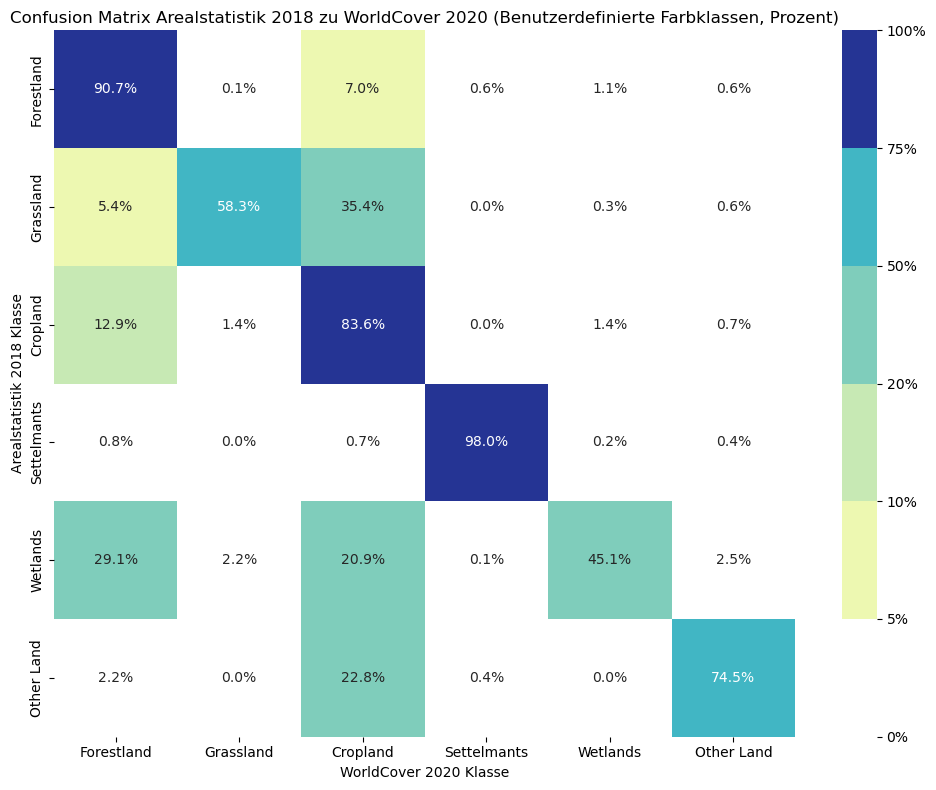

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap, BoundaryNorm
import numpy as np

# Mapping für Label-Namen (optional)
label_names = {
    1: "Forestland",
    2: "Grassland",
    3: "Cropland",
    4: "Settelmants",
    5: "Wetlands",
    6: "Other Land"
}

# CSV mit absoluten Werten laden
cm_df = pd.read_csv("confusion_matrix.csv", index_col=0)

# Prozentwerte pro Zeile berechnen
cm_percent = cm_df.div(cm_df.sum(axis=1), axis=0) * 100
cm_percent = cm_percent.fillna(0.0)

# Spalten und Index in int umwandeln, dann mit Namen ersetzen
cm_percent.columns = cm_percent.columns.astype(int)
cm_percent.index = cm_percent.index.astype(int)
cm_percent_named = cm_percent.rename(index=label_names, columns=label_names)

# Annotierungsformat mit Prozentzeichen
annot_matrix = cm_percent_named.applymap(lambda x: f"{x:.1f}%")

# Definiere Farbpalette passend zu 6 Klassen (7 bounds define 6 intervals)
colors = [(1, 1, 1, 0), "#edf8b1", "#c7e9b4", "#7fcdbb", "#41b6c4", "#253494"]  # Hell zu dunkel
cmap = ListedColormap(colors)

# Benutzerdefinierte Grenzen für Klassen (bins)
bounds = [0, 5, 10, 20, 50, 75, 100]
norm = BoundaryNorm(bounds, cmap.N)

plt.figure(figsize=(10, 8))
ax = sns.heatmap(
    cm_percent_named,
    annot=annot_matrix,
    fmt="",
    cmap=cmap,
    norm=norm,
    xticklabels=cm_percent_named.columns,
    yticklabels=cm_percent_named.index,
    cbar=True
)

plt.title("Confusion Matrix Arealstatistik 2018 zu WorldCover 2020 (Benutzerdefinierte Farbklassen, Prozent)")
plt.xlabel("WorldCover 2020 Klasse")
plt.ylabel("Arealstatistik 2018 Klasse")
plt.tight_layout()

# Colorbar mit benutzerdefinierten Ticklabels anpassen
colorbar = ax.collections[0].colorbar
colorbar.set_ticks(bounds)
colorbar.set_ticklabels([f"{b}%" for b in bounds])
colorbar.set_label("", rotation=270, labelpad=20)

plt.show()


color change

manu, schreiben, welche datei er nehmen soll vom S laufwerk

C:\Users\alexa\AppData\Local\Temp\ipykernel_30276\352834159.py:29: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_matrix = cm_percent_named.applymap(lambda x: f"{x:.1f}%" if x >= 2 else "")


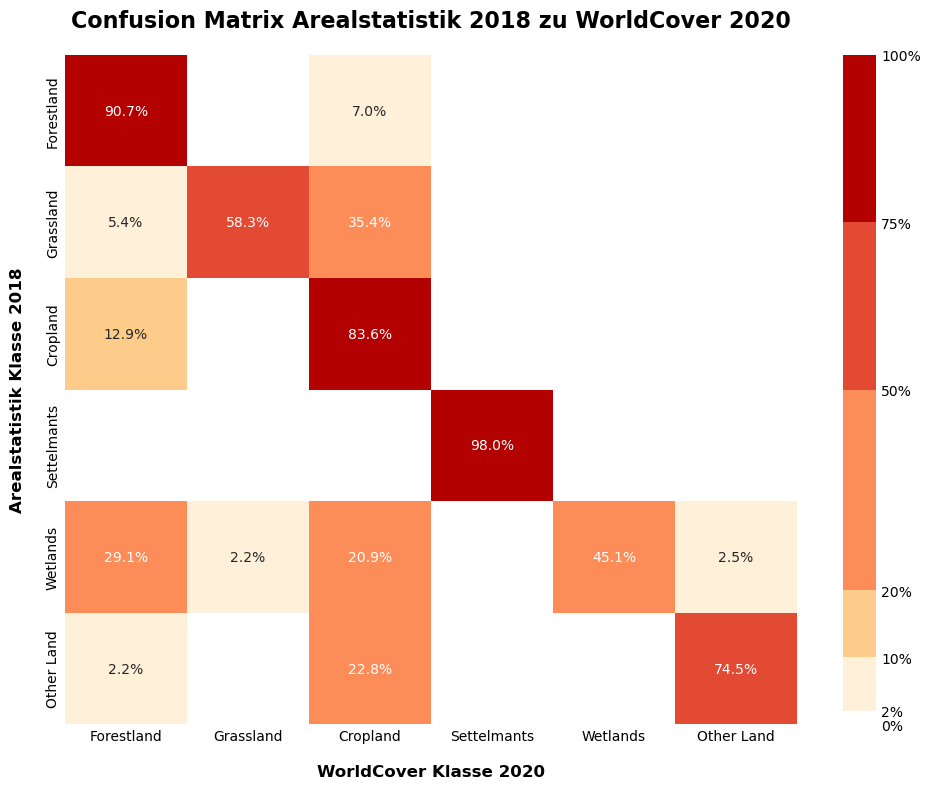

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap, BoundaryNorm

# Mapping für Label-Namen (optional)
label_names = {
    1: "Forestland",
    2: "Grassland",
    3: "Cropland",
    4: "Settelmants",
    5: "Wetlands",
    6: "Other Land"
}

# CSV mit absoluten Werten laden
cm_df = pd.read_csv("confusion_matrix.csv", index_col=0)

# Prozentwerte pro Zeile berechnen
cm_percent = cm_df.div(cm_df.sum(axis=1), axis=0) * 100
cm_percent = cm_percent.fillna(0.0)

# Spalten und Index in int umwandeln, dann mit Namen ersetzen
cm_percent.columns = cm_percent.columns.astype(int)
cm_percent.index = cm_percent.index.astype(int)
cm_percent_named = cm_percent.rename(index=label_names, columns=label_names)

# Annotation mit Prozent, falls gewünscht
annot_matrix = cm_percent_named.applymap(lambda x: f"{x:.1f}%" if x >= 2 else "")

# Deine Farbpalette (pro Intervall)
colors = [
    (1, 1, 1, 0),            # Transparent für 0-2%
    "#fef0d9",               # Hellgelb
    "#fdcc8a",               # Gelb-Orange
    "#fc8d59",               # Orange
    "#e34a33",               # Rot-Orange
    "#b30000"                # Dunkelrot
]
cmap = ListedColormap(colors)

# Intervalle
bounds = [0, 2, 10, 20, 50, 75, 100]
norm = BoundaryNorm(bounds, cmap.N)

plt.figure(figsize=(10, 8))
ax = sns.heatmap(
    cm_percent_named,
    annot=annot_matrix,
    fmt="",
    cmap=cmap,
    norm=norm,
    xticklabels=cm_percent_named.columns,
    yticklabels=cm_percent_named.index,
    cbar=False  # <-- Disable default colorbar from seaborn!
)

# Entfernen von Achsstrichen
for spine in ax.spines.values():
    spine.set_visible(False)
ax.tick_params(axis='both', which='both', length=0)

plt.title("Confusion Matrix Arealstatistik 2018 zu WorldCover 2020",
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel("WorldCover Klasse 2020",
           fontsize=12, fontweight='bold', labelpad=15)
plt.ylabel("Arealstatistik Klasse 2018",
           fontsize=12, fontweight='bold', labelpad=15)
plt.tight_layout()

# Jetzt: Colorbar proportional zum Intervall (bounds)
import matplotlib as mpl
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Dummy array for colorbar

# Custom colorbar next to your existing axes
cbar = plt.colorbar(
    sm,
    ax=ax,
    boundaries=bounds,
    spacing="proportional",
    ticks=bounds,
    extend='neither'
)
cbar.set_ticklabels([f"{b}%" for b in bounds])
cbar.set_label("", rotation=270, labelpad=20)

# Remove border and tick lines from colorbar
cbar.outline.set_visible(False)
cbar.ax.tick_params(length=0)

cbar.set_ticklabels([f"{b}%" for b in bounds])
cbar.set_label("", rotation=270, labelpad=20)

plt.show()


ohne nummern

C:\Users\alexa\AppData\Local\Temp\ipykernel_30276\352834159.py:29: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_matrix = cm_percent_named.applymap(lambda x: f"{x:.1f}%" if x >= 2 else "")


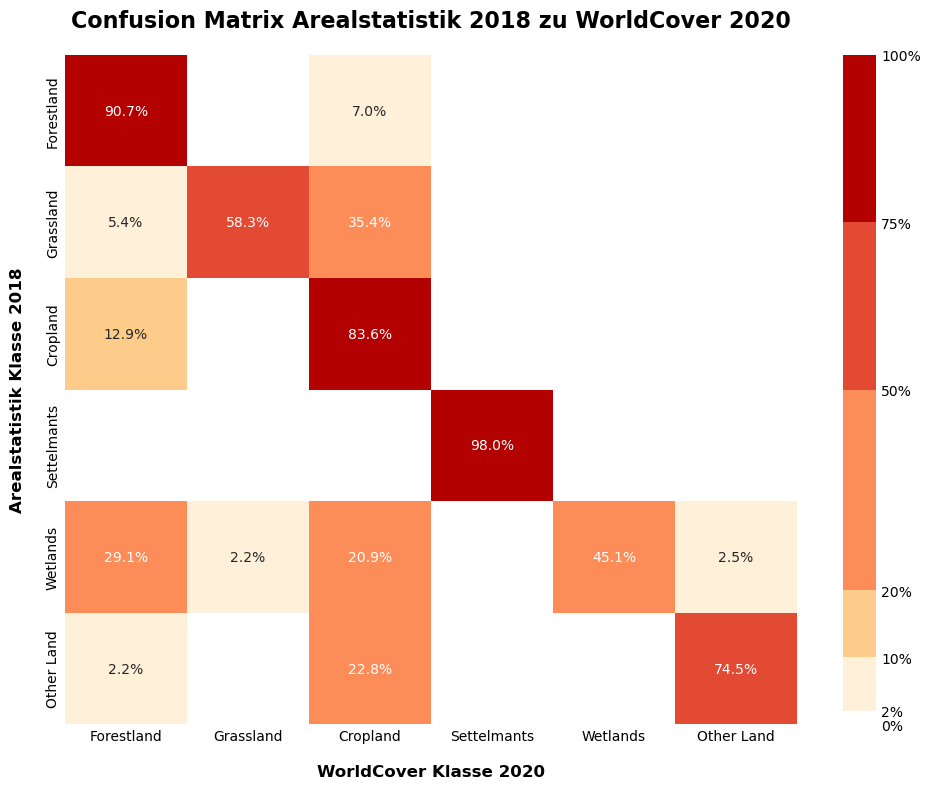

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap, BoundaryNorm

# Mapping für Label-Namen (optional)
label_names = {
    1: "Forestland",
    2: "Grassland",
    3: "Cropland",
    4: "Settelmants",
    5: "Wetlands",
    6: "Other Land"
}

# CSV mit absoluten Werten laden
cm_df = pd.read_csv("confusion_matrix.csv", index_col=0)

# Prozentwerte pro Zeile berechnen
cm_percent = cm_df.div(cm_df.sum(axis=1), axis=0) * 100
cm_percent = cm_percent.fillna(0.0)

# Spalten und Index in int umwandeln, dann mit Namen ersetzen
cm_percent.columns = cm_percent.columns.astype(int)
cm_percent.index = cm_percent.index.astype(int)
cm_percent_named = cm_percent.rename(index=label_names, columns=label_names)

# Annotation mit Prozent, falls gewünscht
# annot_matrix = cm_percent_named.applymap(lambda x: f"{x:.1f}%")

# Deine Farbpalette (pro Intervall)
colors = [
    (1, 1, 1, 0),            # Transparent für 0-2%
    "#fef0d9",               # Hellgelb
    "#fdcc8a",               # Gelb-Orange
    "#fc8d59",               # Orange
    "#e34a33",               # Rot-Orange
    "#b30000"                # Dunkelrot
]
cmap = ListedColormap(colors)

# Intervalle
bounds = [0, 2, 10, 20, 50, 75, 100]
norm = BoundaryNorm(bounds, cmap.N)

plt.figure(figsize=(10, 8))
ax = sns.heatmap(
    cm_percent_named,
    # annot=annot_matrix,
    fmt="",
    cmap=cmap,
    norm=norm,
    xticklabels=cm_percent_named.columns,
    yticklabels=cm_percent_named.index,
    cbar=False  # <-- Disable default colorbar from seaborn!
)

# Entfernen von Achsstrichen
for spine in ax.spines.values():
    spine.set_visible(False)
ax.tick_params(axis='both', which='both', length=0)

plt.title("Confusion Matrix Arealstatistik 2018 zu WorldCover 2020",
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel("WorldCover Klasse 2020",
           fontsize=12, fontweight='bold', labelpad=15)
plt.ylabel("Arealstatistik Klasse 2018",
           fontsize=12, fontweight='bold', labelpad=15)
plt.tight_layout()

# Jetzt: Colorbar proportional zum Intervall (bounds)
import matplotlib as mpl
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Dummy array for colorbar

# Custom colorbar next to your existing axes
cbar = plt.colorbar(
    sm,
    ax=ax,
    boundaries=bounds,
    spacing="proportional",
    ticks=bounds,
    extend='neither'
)
cbar.set_ticklabels([f"{b}%" for b in bounds])
cbar.set_label("", rotation=270, labelpad=20)

# Remove border and tick lines from colorbar
cbar.outline.set_visible(False)
cbar.ax.tick_params(length=0)

cbar.set_ticklabels([f"{b}%" for b in bounds])
cbar.set_label("", rotation=270, labelpad=20)

plt.show()


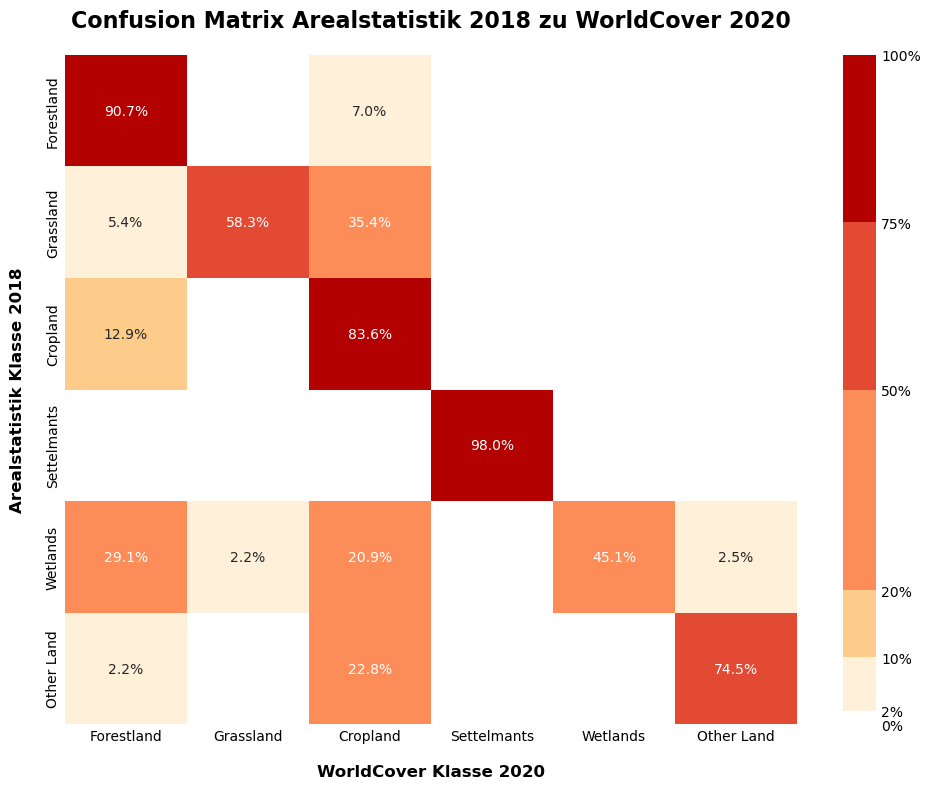

In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib as mpl

# Mapping für Label-Namen (optional)
label_names = {
    1: "Forestland",
    2: "Grassland",
    3: "Cropland",
    4: "Settelmants",
    5: "Wetlands",
    6: "Other Land"
}

# GeoDataFrame direkt laden
df = gpd.read_file("../../../../data/analysis/worldcover/arealstatistik_mapped_points_2020.gpkg")

# Nur Zeilen ohne NaN in den relevanten Spalten behalten
mask = df["IPCC_AS_Id"].notna() & df["IPCC_WC_Id"].notna()
y_true = df.loc[mask, "IPCC_AS_Id"]
y_pred = df.loc[mask, "IPCC_WC_Id"]

# Alle Klassen bestimmen (ohne NaN)
labels = sorted(set(y_true).union(set(y_pred)))

# Confusion Matrix erstellen
cm = confusion_matrix(y_true, y_pred, labels=labels)

# In DataFrame umwandeln mit Klassen als Index und Spaltennamen
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

# Prozentwerte pro Zeile berechnen
cm_percent = cm_df.div(cm_df.sum(axis=1), axis=0) * 100
cm_percent = cm_percent.fillna(0.0)

# Spalten und Index konvertieren und nach Namen mappen
cm_percent.columns = cm_percent.columns.astype(int)
cm_percent.index = cm_percent.index.astype(int)
cm_percent_named = cm_percent.rename(index=label_names, columns=label_names)

# Optionale Annotation
annot_matrix = cm_percent_named.map(lambda x: f"{x:.1f}%" if x >= 2 else "")

# Farbpalette (pro Intervall)
colors = [
    (1, 1, 1, 0),            # Transparent für 0-2%
    "#fef0d9",               # Hellgelb
    "#fdcc8a",               # Gelb-Orange
    "#fc8d59",               # Orange
    "#e34a33",               # Rot-Orange
    "#b30000"                # Dunkelrot
]
cmap = ListedColormap(colors)

bounds = [0, 2, 10, 20, 50, 75, 100]
norm = BoundaryNorm(bounds, cmap.N)

plt.figure(figsize=(10, 8))
ax = sns.heatmap(
    cm_percent_named,
    annot=annot_matrix,
    fmt="",
    cmap=cmap,
    norm=norm,
    xticklabels=cm_percent_named.columns,
    yticklabels=cm_percent_named.index,
    cbar=False  # Keine Standardfarblegende
)

# Entfernen von Achsstrichen
for spine in ax.spines.values():
    spine.set_visible(False)
ax.tick_params(axis='both', which='both', length=0)

plt.title("Confusion Matrix Arealstatistik 2018 zu WorldCover 2020",
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel("WorldCover Klasse 2020",
           fontsize=12, fontweight='bold', labelpad=15)
plt.ylabel("Arealstatistik Klasse 2018",
           fontsize=12, fontweight='bold', labelpad=15)
plt.tight_layout()

# Custom colorbar
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

cbar = plt.colorbar(
    sm,
    ax=ax,
    boundaries=bounds,
    spacing="proportional",
    ticks=bounds,
    extend='neither'
)
cbar.set_ticklabels([f"{b}%" for b in bounds])
cbar.set_label("", rotation=270, labelpad=20)
cbar.outline.set_visible(False)
cbar.ax.tick_params(length=0)

plt.show()
